In [54]:
import os
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
import mlrose_hiive
import time
seed = 22955

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Problem 1: Income 

In [37]:
df_income = pd.read_csv('../Adult/income.csv', header= None)
df_income.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df_income['workclass']= df_income['workclass'].str.strip()
df_income['education']= df_income['education'].str.strip()
df_income['marital-status']= df_income['marital-status'].str.strip()
df_income['occupation']= df_income['occupation'].str.strip()
df_income['relationship']= df_income['relationship'].str.strip()
df_income['race']= df_income['race'].str.strip()
df_income['sex']= df_income['sex'].str.strip()
df_income['native-country']= df_income['native-country'].str.strip()
df_income['income']= df_income['income'].str.strip()

### Checking for Null Values

In [38]:
df_income.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [39]:
df_income = df_income.fillna("Unknown")

### Ground truth balance

In [40]:
df_income.value_counts('income')

income
<=50K    37155
>50K     11687
dtype: int64

### Explonatary Data Analysis

#### Age

Text(372.98863636363626, 0.5, 'No of Occurance')

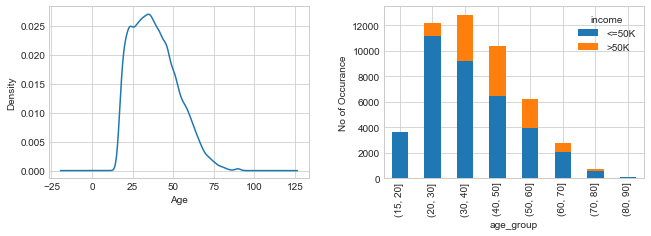

In [41]:
df_income['age_group'] = pd.cut(df_income.age, bins=[15,20,30,40,50,60,70,80,90])
fig, ax = plt.subplots(1, 2, figsize=(10, 4), )
fig.tight_layout(pad=5)

df_income['age'].plot.kde(ax=ax[0])
ax[0].set_xlabel('Age')

pd.crosstab(df_income['age_group'],df_income['income']).plot.bar(stacked=True, ax=ax[1])
ax[1].set_ylabel('No of Occurance')


#### Education

(0.0, 100.0)

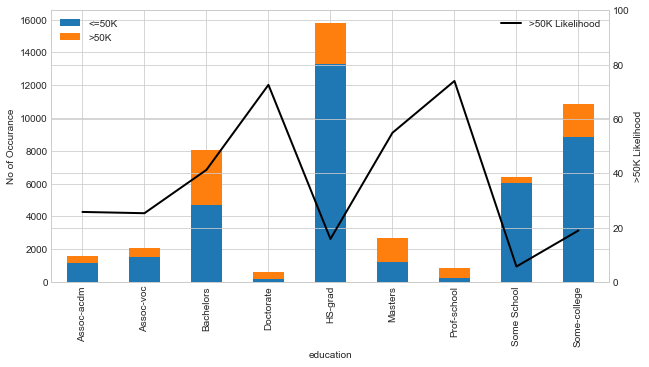

In [42]:
df_income['education'] = df_income['education'].replace(['1st-4th', '5th-6th', '7th-8th','9th','10th','11th','12th', 'Preschool'], 'Some School')
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['education'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['education'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])


#### Work Class

(0.0, 100.0)

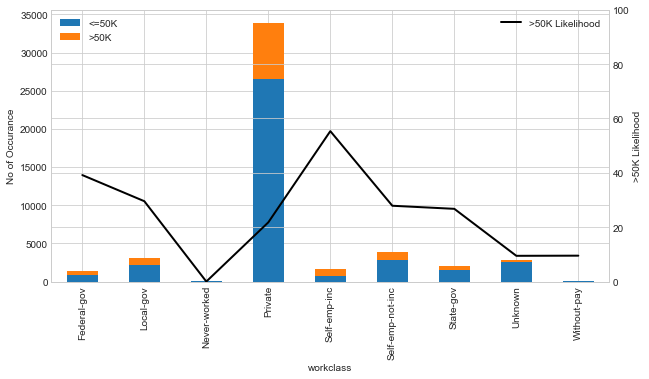

In [43]:
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['workclass'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['workclass'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

#### race

(0.0, 100.0)

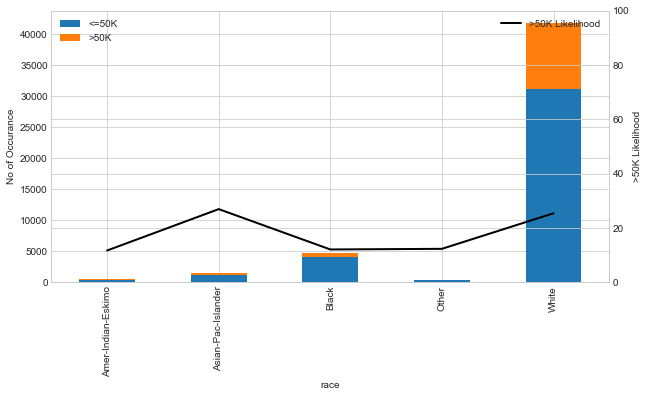

In [44]:
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['race'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['race'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

#### sex

(0.0, 100.0)

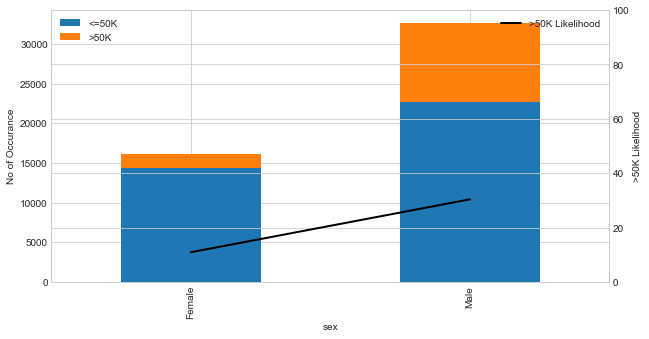

In [45]:
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['sex'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['sex'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

#### marital-status

(0.0, 100.0)

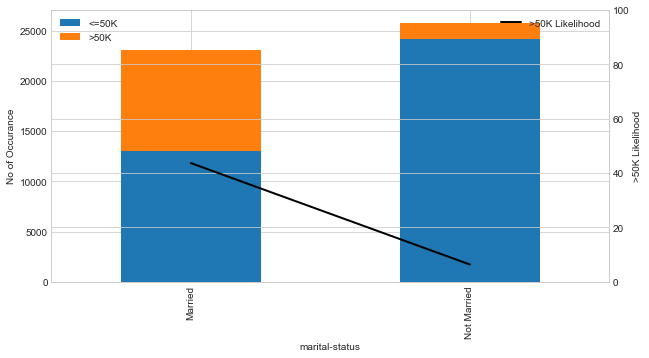

In [46]:
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

df_income['marital-status'] = df_income['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
df_income['marital-status'] = df_income['marital-status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Not Married')
pd.crosstab(df_income['marital-status'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['marital-status'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

In [47]:
df_income['marital-status'].value_counts()

Not Married    25798
Married        23044
Name: marital-status, dtype: int64

#### native-country

(0.0, 100.0)

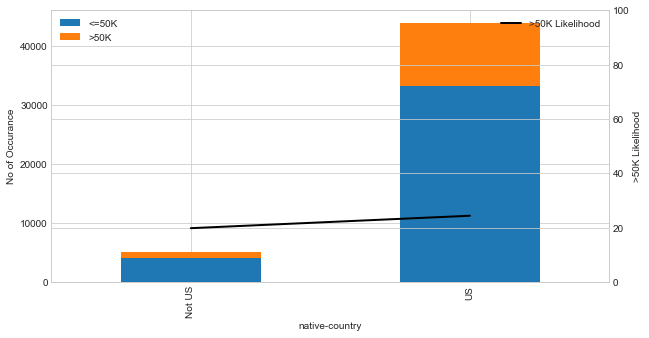

In [48]:
df_income.loc[df_income['native-country']!='United-States', 'native-country'] = 'Not US'
df_income.loc[df_income['native-country']=='United-States', 'native-country'] = 'US'
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['native-country'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['native-country'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

#### occupation

(0.0, 100.0)

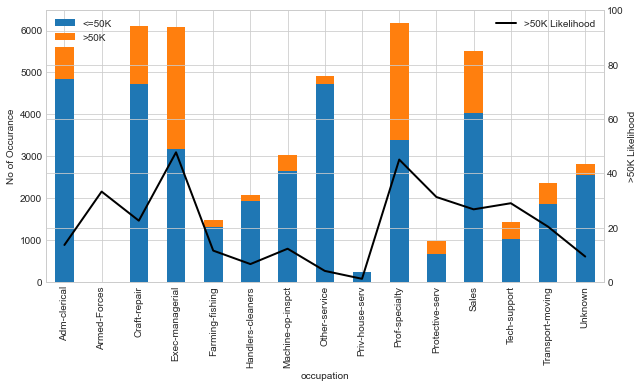

In [49]:
fig,ax = plt.subplots(figsize=(10,5))
axp = ax.twinx()

pd.crosstab(df_income['occupation'],df_income['income']).plot.bar(ax=ax, stacked=True)

df =pd.crosstab(df_income['occupation'],df_income['income'])

df['>50K Likelihood'] = df['>50K']/(df['>50K']+df['<=50K'])*100
df['>50K Likelihood'].plot(ax=axp, color = 'black',linewidth=2.0,use_index = True)

ax.legend(loc=2)  
axp.legend(loc=1)
ax.set_ylabel('No of Occurance')
axp.set_ylabel('>50K Likelihood')
axp.set_ylim([0,100])

## preperation for model traning¶

In [50]:
df_income['capital-gain-cat'] = 0
df_income.loc[df_income['capital-gain']>0, 'capital-gain-cat'] = 1
df_income['capital-gain-cat'] =df_income['capital-gain-cat'].astype('category')

df_income['capital-loss-cat'] = 0
df_income.loc[df_income['capital-loss']>0, 'capital-loss-cat'] = 1
df_income['capital-loss-cat'] =df_income['capital-loss-cat'].astype('category')


df_income['hours-cat'] = 0
df_income.loc[df_income['hours-per-week']==40, 'hours-cat'] = '40'
df_income.loc[df_income['hours-per-week']>40, 'hours-cat'] = '>40'
df_income.loc[df_income['hours-per-week']<40, 'hours-cat'] = '<40'

df_income = df_income[['workclass', 'fnlwgt', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'native-country','income', 'age_group', 'capital-gain-cat', 'capital-loss-cat',
       'hours-cat']]


### one-hot encoding and normalization

In [51]:
cot_col = ['workclass','education', 'marital-status', 'occupation','relationship', 'race', 'sex',
           'native-country', 'age_group', 'capital-gain-cat','capital-loss-cat', 'hours-cat']
df_cat = df_income[cot_col]
df_cat = pd.get_dummies(df_cat).astype('category')

numric_col = ['fnlwgt','capital-gain','capital-loss']
df_numeric = df_income[numric_col]
df_numeric = df_numeric.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_income_final = pd.concat([df_cat,df_numeric,df_income['income']],axis=1)

df_income_final.loc[df_income_final['income']=='>50K', 'income']=1
df_income_final.loc[df_income_final['income']=='<=50K', 'income']=0
df_income_final['income'] = df_income_final['income'].astype('category')


### train_test split

In [59]:
df_income_final = df_income_final.sample(n=2000, replace=False, random_state=20)
X = df_income_final.drop('income', axis=1).values
y = df_income_final['income'].values
RU = RandomUnderSampler(random_state=20, sampling_strategy = 'majority')
X_RU, y_RU = RU.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_RU, y_RU, test_size=0.2, random_state=20)



# X_train_RU, y_train_RU = RU.fit_resample(X_train, y_train)

print("ratio of >50 in data: ", y_train.astype('int').sum()/len(y_train))
# print("ratio of >50 in RandomUnderSampler balanced data: ", y_train_RU.astype('int').sum()/len(y_train_RU))

print(len(y_train))
# print(len(y_train_RU))


ratio of >50 in data:  0.5151098901098901
728


## modeling

### ANN Model

#### ANN structure

In [ ]:
def structure_hypertunning(X_train, X_test, y_train, y_test):
    f1_test = []
    f1_train = []
    hiddenUnit = range(5, 40, 5)
    for units in hiddenUnit:         
            clf = MLPClassifier(hidden_layer_sizes=(units,2,), solver='adam', activation='logistic', 
                                learning_rate_init=0.1, max_iter=1000, early_stopping = False, random_state=20)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(np.mean(scores))
      
    plt.plot(hiddenUnit, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hiddenUnit, f1_train, 'o-', color = 'b', label='Train F1 Score')
    
    plt.ylabel('F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title("ANN Model No of units tunning")
    plt.legend(loc='best')
    plt.show()
    


In [ ]:
structure_hypertunning(X_train, X_test, y_train, y_test)

In [ ]:
def ANNGridSearchCV(X_train, y_train):
    learning_rates = [0.01, 0.05, 0.1, 0.2, 0.25]
    activation = ['relu', 'tanh', 'logistic']
    param_grid = {'learning_rate_init': learning_rates, 'activation':activation}

    ANN_grid = GridSearchCV(estimator = MLPClassifier(hidden_layer_sizes=(10,2,), solver='adam',max_iter=1000,early_stopping =False, random_state=20),param_grid=param_grid, cv=5)

    ANN_grid.fit(X_train, y_train)

    return ANN_grid

In [ ]:
ANN_grid = ANNGridSearchCV(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(ANN_grid.best_params_)

In [ ]:
cv_results = pd.DataFrame(ANN_grid.cv_results_)
pd.DataFrame(ANN_grid.cv_results_)

In [ ]:
cv_results.set_index('param_learning_rate_init', inplace=True)
cv_results.groupby(['param_activation'])['mean_test_score'].plot(legend=True)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)
for i, param_activation in enumerate(['logistic', 'relu','tanh']):
    cv_results_activation = cv_results[cv_results['param_activation']==param_activation]
    cv_results_activation.set_index('param_hidden_layer_sizes', inplace=True)
    cv_results_activation.groupby(['param_learning_rate_init'])['mean_test_score'].plot(ax=ax[i], legend=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

# Optimization Comparison 

## Problem 1: OneMax

In [ ]:
length = 500
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=length,
                                   fitness_fn=fitness,
                                   maximize=True,
                                   max_val=2)
output_directory = "OneMax"

### 1- mimic

In [ ]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name='mimic',
                       seed=seed,
                       output_directory=output_directory,
                       population_sizes=[10, 100, 500],
                       keep_percent_list=[0.05,0.20,0.5],
                       iteration_list=[10,50,250,500,1000,5000],
                       max_attempts=200,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1)  

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Time(s) Vs. Hyper Parameters ', fontsize=20, y=1.1)  

### 2- Simulated Annealing

In [ ]:
sa = mlrose_hiive.SARunner(problem=problem,
                   experiment_name='SA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   temperature_list=[0.01, 0.1, 1, 10,20],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])
sa_stats, sa_curve = sa.run()

In [ ]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

In [ ]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### 3- Randomized Hill Climbing

In [ ]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name='RH',
                    output_directory=output_directory,
                    seed=seed,
                    max_attempts=200,
                    iteration_list=[10,50,250,500,1000,5000],
                    restart_list=[5, 10, 15, 20])
rhc_stats, rhc_curve = rhc.run()

In [ ]:

rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Fitness'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Fitness'].plot(legend=True, ylabel='Fitness' )
plt.suptitle('RHC Fitness Vs. Hyper Parameters ', fontsize=20, y=1) 

In [ ]:
rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Time'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Time'].plot(legend=True, ylabel='Time(s)' )
plt.suptitle('RHC Time Vs. Hyper Parameters ', fontsize=20, y=1) 

### 4- Genetic Algorithm

In [ ]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name='GA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   population_sizes=[10, 100, 500],
                   mutation_rates=[0.1, 0.25, 0.5, 1])
ga_stats, ga_curve = ga.run()

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### Model Comparison

In [ ]:
def get_max_info(df, iteration):
    df_iteration = df[df['Iteration'] == iteration]
    max_fittness = int(df_iteration['Fitness'].max())
    max_fittness_time = df_iteration[df_iteration['Fitness'] == max_fittness]['Time'].min()
    return max_fittness, max_fittness_time
    
max_fittness_MIMIC ={}
max_fittness_time_MIMIC ={}

max_fittness_SA ={}
max_fittness_time_SA ={}

max_fittness_RHC = {}
max_fittness_time_RHC={}

max_fittness_GA={}
max_fittness_time_GA={}

for iteration in [10,50,250,500,1000,5000]:
    max_fittness_MIMIC[iteration], max_fittness_time_MIMIC[iteration] = get_max_info(mimic_stats,iteration)
    max_fittness_SA[iteration], max_fittness_time_SA[iteration] = get_max_info(sa_stats,iteration)
    max_fittness_RHC[iteration], max_fittness_time_RHC[iteration] = get_max_info(rhc_stats,iteration)
    max_fittness_GA[iteration], max_fittness_time_GA[iteration] = get_max_info(ga_stats,iteration)



In [ ]:
p1 = plt.plot(max_fittness_MIMIC.keys(), max_fittness_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_SA.keys(), max_fittness_SA.values(), label='SA')
p3 = plt.plot(max_fittness_RHC.keys(), max_fittness_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_GA.keys(), max_fittness_GA.values(), label='GA')
plt.legend()
plt.title("Comparison of Max Fittness at each iteration")
plt.xscale("log")
plt.xlabel('iteration') 
plt.ylabel('Fittness') 
plt.show()

In [ ]:
p1 = plt.plot(max_fittness_time_MIMIC.keys(), max_fittness_time_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_time_SA.keys(), max_fittness_time_SA.values(), label='SA')
p3 = plt.plot(max_fittness_time_RHC.keys(), max_fittness_time_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_time_GA.keys(), max_fittness_time_GA.values(), label='GA')
plt.legend()
plt.title("Comparison of time to reach max Fittness at each iteration")
plt.xscale("log")
plt.xlabel('Iteration') 
plt.ylabel('Time(s)') 
plt.show()

## Problem 2: FourPeaks

In [ ]:
length = 500
t_pct = 0.15
fitness = mlrose_hiive.FourPeaks(t_pct = t_pct)
problem = mlrose_hiive.DiscreteOpt(length=length,
                                   fitness_fn=fitness,
                                   maximize=True)
output_directory = "Four_Peaks"

### 1- mimic

In [ ]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name='mimic',
                       seed=seed,
                       output_directory=output_directory,
                       population_sizes=[10, 100, 500],
                       keep_percent_list=[0.05,0.20,0.5],
                       iteration_list=[10,50,250,500,1000,5000],
                       max_attempts=200,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1)  

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Time(s) Vs. Hyper Parameters ', fontsize=20, y=1.1)  

### 2- Simulated Annealing

In [ ]:
sa = mlrose_hiive.SARunner(problem=problem,
                   experiment_name='SA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   temperature_list=[0.01, 0.1, 1, 10,20],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])
sa_stats, sa_curve = sa.run()

In [ ]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

In [ ]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### 3- Randomized Hill Climbing

In [ ]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name='RH',
                    output_directory=output_directory,
                    seed=seed,
                    max_attempts=200,
                    iteration_list=[10,50,250,500,1000,5000],
                    restart_list=[5, 10, 15, 20])
rhc_stats, rhc_curve = rhc.run()

In [ ]:
rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Fitness'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Fitness'].plot(legend=True, ylabel='Fitness' )
plt.suptitle('RHC Fitness Vs. Hyper Parameters ', fontsize=20, y=1) 

In [ ]:
rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Time'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Time'].plot(legend=True, ylabel='Time(s)' )
plt.suptitle('RHC Time Vs. Hyper Parameters ', fontsize=20, y=1) 

### 4- Genetic Algorithm

In [ ]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name='GA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   population_sizes=[10, 100, 500],
                   mutation_rates=[0.1, 0.25, 0.5, 1])
ga_stats, ga_curve = ga.run()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### Model Comparison

In [ ]:
max_fittness_MIMIC ={}
max_fittness_time_MIMIC ={}

max_fittness_SA ={}
max_fittness_time_SA ={}

max_fittness_RHC = {}
max_fittness_time_RHC={}

max_fittness_GA={}
max_fittness_time_GA={}

for iteration in [10,50,250,500,1000,5000]:
    max_fittness_MIMIC[iteration], max_fittness_time_MIMIC[iteration] = get_max_info(mimic_stats,iteration)
    max_fittness_SA[iteration], max_fittness_time_SA[iteration] = get_max_info(sa_stats,iteration)
    max_fittness_RHC[iteration], max_fittness_time_RHC[iteration] = get_max_info(rhc_stats,iteration)
    max_fittness_GA[iteration], max_fittness_time_GA[iteration] = get_max_info(ga_stats,iteration)

In [ ]:
p1 = plt.plot(max_fittness_MIMIC.keys(), max_fittness_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_SA.keys(), max_fittness_SA.values(), label='SA')
p3 = plt.plot(max_fittness_RHC.keys(), max_fittness_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_GA.keys(), max_fittness_GA.values(), label='GA')
plt.legend()
plt.title("Comparison of Max Fittness at each iteration")
plt.xscale("log")
plt.xlabel('iteration') 
plt.ylabel('Fittness') 
plt.show()

In [ ]:
p1 = plt.plot(max_fittness_time_MIMIC.keys(), max_fittness_time_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_time_SA.keys(), max_fittness_time_SA.values(), label='SA')
p3 = plt.plot(max_fittness_time_RHC.keys(), max_fittness_time_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_time_GA.keys(), max_fittness_time_GA.values(), label='GA')
plt.legend()
plt.xscale("log")
plt.title("Comparison of time to reach max Fittness at each iteration")
plt.xlabel('Iteration') 
plt.ylabel('Time(s)') 
plt.show()

## Problem 3: Knapsack

In [19]:
np.random.seed(22955)
length = 25
weights = np.random.randint(1, 3, length) 
values = np.random.randint(1, 10, length)
max_weight_pct = 0.5

fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)
problem = mlrose_hiive.DiscreteOpt(length=length,
                                   fitness_fn=fitness,
                                   maximize=True)
output_directory = "Knapsack"

In [20]:
# import mlrose_hiive
# import networkx as nx

# # Define a random graph with 100 nodes
# G = nx.fast_gnp_random_graph(n=25, p=0.2)

# # Define a fitness function to maximize the number of colors used
# fitness_fn = mlrose_hiive.MaxKColor(edges=G.edges)

# # Define an optimization problem with MIMIC
# problem = mlrose_hiive.DiscreteOpt(length=len(G.nodes),
#                                    fitness_fn=fitness_fn,
#                                    maximize=True,
#                                    max_val=4)  # 4 possible colors
# output_directory ='MaxKColor'

### 1- mimic

In [21]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name='mimic',
                       seed=seed,
                       output_directory=output_directory,
                       population_sizes=[10, 100, 500],
                       keep_percent_list=[0.05,0.20,0.5],
                       iteration_list=[10,50,250,500,1000,5000],
                       max_attempts=200,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()

Text(0.5, 1.1, 'MIMIC Fitness Vs. Hyper Parameters ')

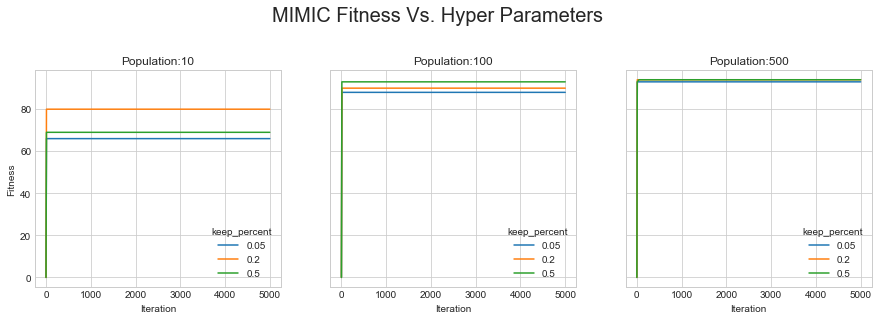

In [22]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1)  

Text(0.5, 1.1, 'MIMIC Time(s) Vs. Hyper Parameters ')

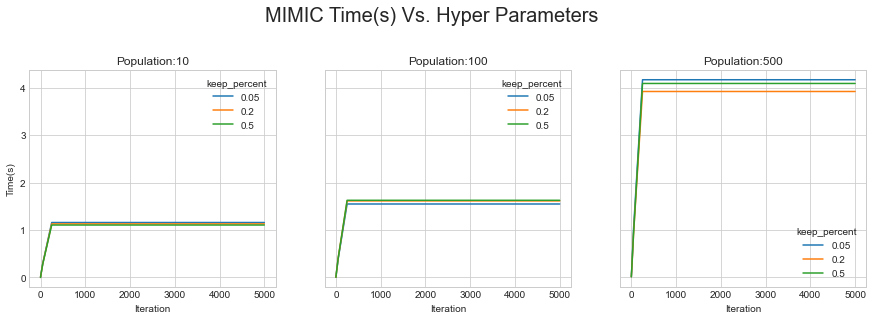

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    mimic_stats_pop = mimic_stats[mimic_stats['Population Size']==population]
    mimic_stats_pop.set_index('Iteration', inplace=True)
    mimic_stats_pop.groupby(['Keep Percent'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)', title= 'Population:{}'.format(population) )
    ax[i].legend(title="keep_percent")
fig.suptitle('MIMIC Time(s) Vs. Hyper Parameters ', fontsize=20, y=1.1)  

### 2- Simulated Annealing

In [24]:
sa = mlrose_hiive.SARunner(problem=problem,
                   experiment_name='SA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   temperature_list=[0.01, 0.1, 1, 10,20],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])
sa_stats, sa_curve = sa.run()

Text(0.5, 1.1, 'SA Fitness Vs. Hyper Parameters ')

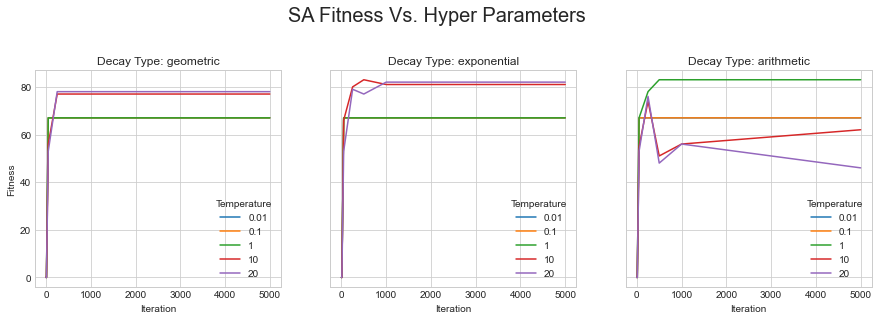

In [25]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

Text(0.5, 1.1, 'SA Time Vs. Hyper Parameters ')

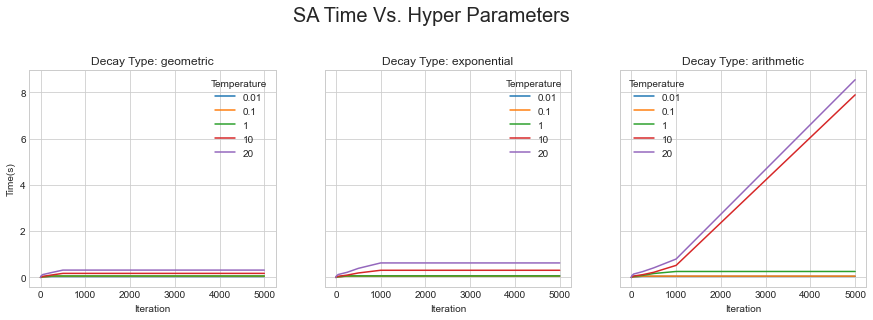

In [26]:
sa_stats['Temperature']=sa_stats['Temperature'].astype('str')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, schedule_type in enumerate(['geometric', 'exponential', 'arithmetic']):
    sa_stats_type = sa_stats[sa_stats['schedule_type']==schedule_type]
    sa_stats_type.set_index('Iteration', inplace=True)
    sa_stats_type.groupby(['Temperature'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'Decay Type: {}'.format(schedule_type) )
    ax[i].legend(title="Temperature")
fig.suptitle('SA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### 3- Randomized Hill Climbing

In [27]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name='RH',
                    output_directory=output_directory,
                    seed=seed,
                    max_attempts=200,
                    iteration_list=[10,50,250,500,1000,5000],
                    restart_list=[5, 10, 15, 20])
rhc_stats, rhc_curve = rhc.run()

Text(0.5, 1, 'RHC Fitness Vs. Hyper Parameters ')

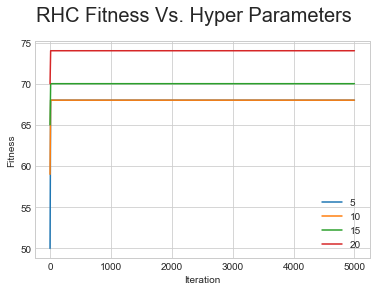

In [28]:
rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Fitness'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Fitness'].plot(legend=True, ylabel='Fitness' )
plt.suptitle('RHC Fitness Vs. Hyper Parameters ', fontsize=20, y=1) 

Text(0.5, 1, 'RHC Time Vs. Hyper Parameters ')

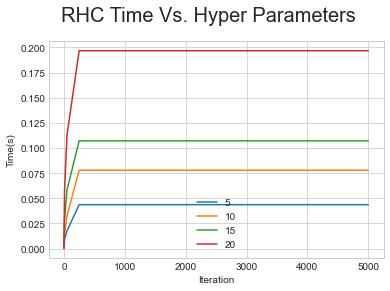

In [29]:
rhc_stats_plot = rhc_stats.copy()
rhc_stats_plot['Fitness'] = rhc_stats_plot.groupby(['Restarts','Iteration'])['Time'].transform('max')
rhc_stats_plot = rhc_stats_plot[rhc_stats_plot['current_restart']==0]
rhc_stats_plot.set_index('Iteration', inplace=True)
rhc_stats_plot.groupby(['Restarts',])['Time'].plot(legend=True, ylabel='Time(s)' )
plt.suptitle('RHC Time Vs. Hyper Parameters ', fontsize=20, y=1) 

### 4- Genetic Algorithm

In [30]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name='GA',
                   output_directory=output_directory,
                   seed=seed,
                   max_attempts=200,
                   iteration_list=[10,50,250,500,1000,5000],
                   population_sizes=[10, 100, 500],
                   mutation_rates=[0.1, 0.25, 0.5, 1])
ga_stats, ga_curve = ga.run()

Text(0.5, 1.1, 'GA Fitness Vs. Hyper Parameters ')

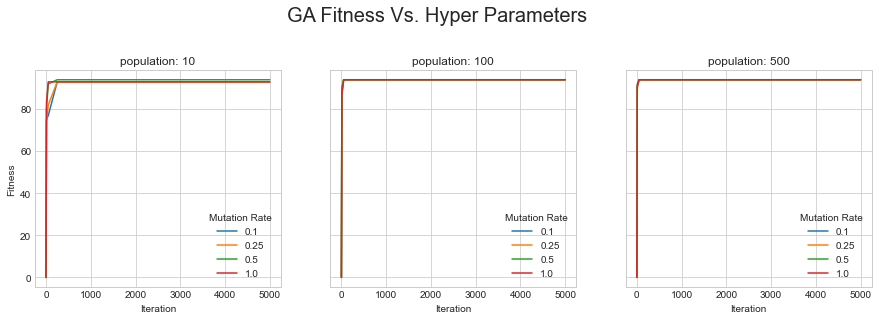

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Fitness'].plot(ax=ax[i], legend=True, ylabel='Fitness' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Fitness Vs. Hyper Parameters ', fontsize=20, y=1.1) 

Text(0.5, 1.1, 'GA Time Vs. Hyper Parameters ')

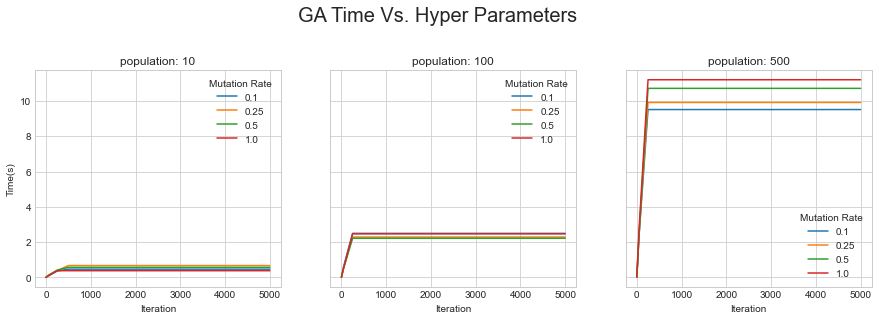

In [32]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for i, population in enumerate([10, 100, 500]):
    ga_stats_pop = ga_stats[ga_stats['Population Size']==population]
    ga_stats_pop.set_index('Iteration', inplace=True)
    ga_stats_pop.groupby(['Mutation Rate'])['Time'].plot(ax=ax[i], legend=True, ylabel='Time(s)' , title= 'population: {}'.format(population) )
    ax[i].legend(title="Mutation Rate")
fig.suptitle('GA Time Vs. Hyper Parameters ', fontsize=20, y=1.1) 

### Model Comparison

In [33]:
def get_max_info(df, iteration):
    df_iteration = df[df['Iteration'] == iteration]
    max_fittness = int(df_iteration['Fitness'].max())
    max_fittness_time = df_iteration[df_iteration['Fitness'] == max_fittness]['Time'].min()
    return max_fittness, max_fittness_time

max_fittness_MIMIC ={}
max_fittness_time_MIMIC ={}

max_fittness_SA ={}
max_fittness_time_SA ={}

max_fittness_RHC = {}
max_fittness_time_RHC={}

max_fittness_GA={}
max_fittness_time_GA={}

for iteration in [10,50,250,500,1000,5000]:
    max_fittness_MIMIC[iteration], max_fittness_time_MIMIC[iteration] = get_max_info(mimic_stats,iteration)
    max_fittness_SA[iteration], max_fittness_time_SA[iteration] = get_max_info(sa_stats,iteration)
    max_fittness_RHC[iteration], max_fittness_time_RHC[iteration] = get_max_info(rhc_stats,iteration)
    max_fittness_GA[iteration], max_fittness_time_GA[iteration] = get_max_info(ga_stats,iteration)

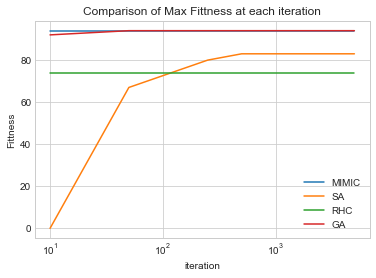

In [34]:
p1 = plt.plot(max_fittness_MIMIC.keys(), max_fittness_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_SA.keys(), max_fittness_SA.values(), label='SA')
p3 = plt.plot(max_fittness_RHC.keys(), max_fittness_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_GA.keys(), max_fittness_GA.values(), label='GA')
plt.legend()
plt.title("Comparison of Max Fittness at each iteration")
plt.xscale("log")
plt.xlabel('iteration') 
plt.ylabel('Fittness') 
plt.show()

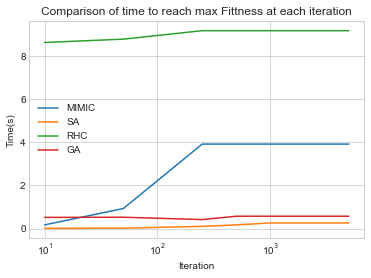

In [35]:
p1 = plt.plot(max_fittness_time_MIMIC.keys(), max_fittness_time_MIMIC.values(), label='MIMIC')
p2 = plt.plot(max_fittness_time_SA.keys(), max_fittness_time_SA.values(), label='SA')
p3 = plt.plot(max_fittness_time_RHC.keys(), max_fittness_time_RHC.values(), label='RHC')
p4 = plt.plot(max_fittness_time_GA.keys(), max_fittness_time_GA.values(), label='GA')
plt.legend()
plt.title("Comparison of time to reach max Fittness at each iteration")
plt.xlabel('Iteration') 
plt.xscale("log")
plt.ylabel('Time(s)') 
plt.show()

## ANN model

In [128]:
def get_train_test_accuracy(nn_model):
    start = time.time()
    nn_model.fit(X_train, y_train)
    end = time.time()
    elapsed_time = end - start
    
    y_train_pred = nn_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_test_pred = nn_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return train_accuracy,test_accuracy,elapsed_time, nn_model

### ANN with Random Hill Climb

In [149]:
learning_rates = [0.001, 0.1, 0.5, 0.75]
restarts = [1,10,20]
model_df =pd.DataFrame()
best_test_accuracy = 0
index = 0

for restart in restarts:
    for learning_rate in learning_rates:

        
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
        algorithm = 'random_hill_climb', restarts=restart, max_iters = 10000, \
        is_classifier = True, learning_rate = learning_rate, \
        early_stopping = True, max_attempts =100, \
        random_state = 22955)
        
        param_1 = restart
        param_2 = learning_rate
        train_accuracy,test_accuracy,elapsed_time,nn_model = get_train_test_accuracy(nn_model)
        
        
        model_df.loc[index, 'param_1'] = param_1
        model_df.loc[index, 'param_2'] = param_2
        
        model_df.loc[index, 'train_accuracy'] = train_accuracy
        model_df.loc[index, 'test_accuracy'] = test_accuracy
        model_df.loc[index, 'time'] = elapsed_time

        if test_accuracy > best_test_accuracy:
            best_model = nn_model
            best_param_1 = param_1
            best_param_2 = param_2
            best_test_accuracy = test_accuracy
            best_test_train_accuracy = train_accuracy
        index += 1

model_RH_df = model_df.copy()

print("best_test_accuracy: ", best_test_accuracy)
print("best_param_1: ", best_param_1)
print("best_param_2: ", best_param_2)


best_test_accuracy:  0.7857142857142857
best_param_1:  10
best_param_2:  0.1


Text(0.5, 1, 'NN with RHC optimizer')

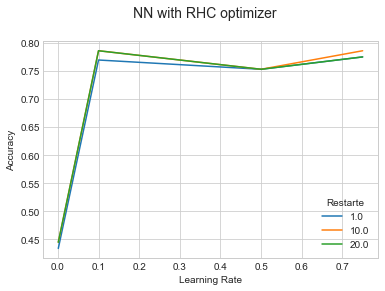

In [150]:
model_df_plot = model_df.copy()
model_df_plot.set_index('param_2', inplace=True)
model_df_plot.groupby(['param_1'])['test_accuracy'].plot(legend=True, ylabel='Time(s)' )
plt.xlabel('Learning Rate') 
plt.ylabel('Accuracy') 
plt.legend(title="Restarte")
plt.suptitle('NN with RHC optimizer', fontsize=14, y=1) 

### ANN with SA

In [137]:
schedules = [('Geomertic', mlrose_hiive.GeomDecay()), ('Exponential', mlrose_hiive.ExpDecay()), ('Arithmatic',mlrose_hiive.ArithDecay())]
learning_rates = [0.001, 0.1, 0.5, 0.75]
model_df =pd.DataFrame()
best_test_accuracy = 0
index = 0

for type_ , schedule in schedules:
    for learning_rate in learning_rates:
    
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
        algorithm = 'simulated_annealing', schedule=schedule, max_iters = 10000, \
        is_classifier = True, learning_rate = learning_rate, \
        early_stopping = True, max_attempts =100, \
        random_state = 22955, curve = True)
        
        param_1 = schedule
        param_2 = learning_rate
        train_accuracy,test_accuracy,elapsed_time,nn_model  = get_train_test_accuracy(nn_model)
        
        
        model_df.loc[index, 'param_1'] = type_
        model_df.loc[index, 'param_2'] = param_2
        
        model_df.loc[index, 'train_accuracy'] = train_accuracy
        model_df.loc[index, 'test_accuracy'] = test_accuracy
        model_df.loc[index, 'time'] = elapsed_time

        if test_accuracy > best_test_accuracy:
            best_model = nn_model
            best_param_1 = param_1
            best_param_2 = param_2
            best_test_accuracy = test_accuracy
            best_test_train_accuracy = train_accuracy
        index += 1

model_SA_df = model_df.copy()

print("best_test_accuracy: ", best_test_accuracy)
print("best_param_1: ", best_param_1)
print("best_param_2: ", best_param_2)


best_test_accuracy:  0.8021978021978022
best_param_1:  1.0
best_param_2:  0.5


Text(0.5, 1, 'NN with SA optimizer')

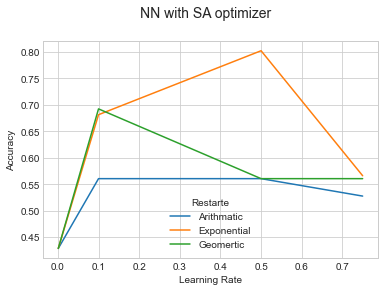

In [138]:
model_df_plot = model_df.copy()
model_df_plot.set_index('param_2', inplace=True)
model_df_plot.groupby(['param_1'])['test_accuracy'].plot(legend=True, ylabel='Time(s)' )
plt.xlabel('Learning Rate') 
plt.ylabel('Accuracy') 
plt.legend(title="Decay Type")
plt.suptitle('NN with SA optimizer', fontsize=14, y=1) 

### ANN with GA

In [155]:
populations = [10, 100, 200, 500]
mutation_probs = [0.1, 0.2, 0.5, 0.75]
model_df =pd.DataFrame()
best_test_accuracy = 0
index = 0

for population in populations:
    for mutation_prob in mutation_probs:
    
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
        algorithm = 'genetic_alg',pop_size=population ,  max_iters = 10000, \
        is_classifier = True, mutation_prob = mutation_prob, \
        early_stopping = True, max_attempts =100, \
        random_state = 22955, curve = True)
        
        param_1 = population
        param_2 = mutation_prob
        train_accuracy,test_accuracy,elapsed_time,nn_model  = get_train_test_accuracy(nn_model)
        
        
        model_df.loc[index, 'param_1'] = param_1
        model_df.loc[index, 'param_2'] = param_2
        
        model_df.loc[index, 'train_accuracy'] = train_accuracy
        model_df.loc[index, 'test_accuracy'] = test_accuracy
        model_df.loc[index, 'time'] = elapsed_time

        if test_accuracy > best_test_accuracy:
            best_model = nn_model
            best_param_1 = param_1
            best_param_2 = param_2
            best_test_accuracy = test_accuracy
            best_test_train_accuracy = train_accuracy
        index += 1

model_GA_df = model_df.copy()

print("best_test_accuracy: ", best_test_accuracy)
print("best_param_1: ", best_param_1)
print("best_param_2: ", best_param_2)


best_test_accuracy:  0.6593406593406593
best_param_1:  500
best_param_2:  0.1


Text(0.5, 1, 'NN with GA optimizer')

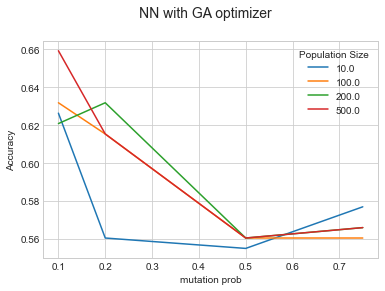

In [156]:
model_df_plot = model_df.copy()
model_df_plot.set_index('param_2', inplace=True)
model_df_plot.groupby(['param_1'])['test_accuracy'].plot(legend=True, ylabel='Time(s)' )
plt.xlabel('mutation prob') 
plt.ylabel('Accuracy') 
plt.legend(title="Population Size")
plt.suptitle('NN with GA optimizer', fontsize=14, y=1) 

### ANN with GD

In [153]:

learning_rates = [0.001, 0.1, 0.5, 0.75]
model_df =pd.DataFrame()
best_test_accuracy = 0
index = 0


for learning_rate in learning_rates:
    
    nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
    algorithm = 'gradient_descent',max_iters = 10000, \
    is_classifier = True, learning_rate = learning_rate, \
    early_stopping = True, max_attempts =100, \
    random_state = 22955, curve = True)


    param_2 = learning_rate
    train_accuracy,test_accuracy,elapsed_time,nn_model  = get_train_test_accuracy(nn_model)



    model_df.loc[index, 'param_2'] = param_2

    model_df.loc[index, 'train_accuracy'] = train_accuracy
    model_df.loc[index, 'test_accuracy'] = test_accuracy
    model_df.loc[index, 'time'] = elapsed_time

    if test_accuracy > best_test_accuracy:
        best_model = nn_model

        best_param_2 = param_2
        best_test_accuracy = test_accuracy
        best_test_train_accuracy = train_accuracy
    index += 1

model_GD_df = model_df.copy()

print("best_test_accuracy: ", best_test_accuracy)

print("best_param_2: ", best_param_2)

best_test_accuracy:  0.7692307692307693
best_param_2:  0.001


Text(0.5, 1, 'NN with GA optimizer')

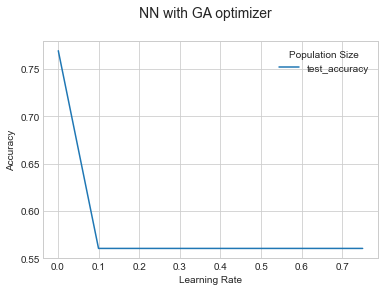

In [154]:
model_df_plot = model_df.copy()
model_df_plot.set_index('param_2', inplace=True)
model_df_plot['test_accuracy'].plot(legend=True, ylabel='Time(s)' )
plt.xlabel('Learning Rate') 
plt.ylabel('Accuracy') 
plt.legend(title="Population Size")
plt.suptitle('NN with GA optimizer', fontsize=14, y=1) 

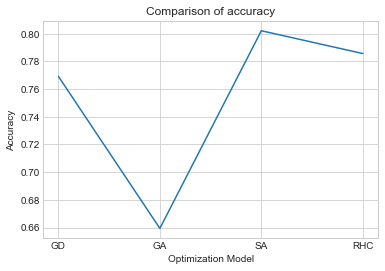

In [177]:
Best_Accuracy_GD = model_GD_df['test_accuracy'].max()
Best_Accuracy_GA = model_GA_df['test_accuracy'].max()
Best_Accuracy_SA = model_SA_df['test_accuracy'].max()
Best_Accuracy_RHC = model_RH_df['test_accuracy'].max()

Best_Accuracy_time_GD = model_GD_df[model_GD_df['test_accuracy'] == model_GD_df['test_accuracy'].max()]['time'].values[0]
Best_Accuracy_time_GA = model_GA_df[model_GA_df['test_accuracy'] == model_GA_df['test_accuracy'].max()]['time'].values[0]
Best_Accuracy_time_SA = model_SA_df[model_SA_df['test_accuracy'] == model_SA_df['test_accuracy'].max()]['time'].values[0]
Best_Accuracy_time_RHC = model_RH_df[model_RH_df['test_accuracy'] == model_RH_df['test_accuracy'].max()]['time'].values[0]


plt.plot(['GD', 'GA', 'SA', 'RHC'], [Best_Accuracy_GD,Best_Accuracy_GA,Best_Accuracy_SA,Best_Accuracy_RHC])
plt.ylabel('Accuracy')
plt.xlabel('Optimization Model')
plt.title('Comparison of accuracy')
plt.show()

In [173]:
Best_Accuracy_time_GA.values[0]

351.5202875137329

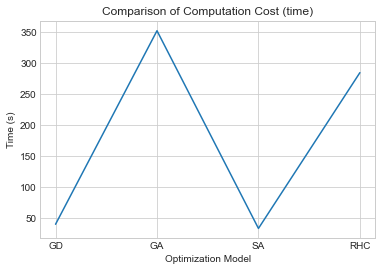

In [178]:
plt.plot( ['GD', 'GA', 'SA', 'RHC'], [Best_Accuracy_time_GD,Best_Accuracy_time_GA,Best_Accuracy_time_SA,Best_Accuracy_time_RHC])
plt.ylabel('Time (s)')
plt.xlabel('Optimization Model')
plt.title('Comparison of Computation Cost (time)')
plt.show()

In [ ]:
Loss_GD = []
Loss_GA = []
Loss_SA = []
Loss_RHC = []

for i in range(1,1000):
    print(i)
    nn_model_RHC = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
        algorithm = 'random_hill_climb', restarts=20, max_iters = i, \
        is_classifier = True, learning_rate = 0.1, \
        early_stopping = True, max_attempts =100, \
        random_state = 22955)

    nn_model_SA = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
    algorithm = 'simulated_annealing', schedule=mlrose_hiive.ExpDecay(), max_iters = i, \
    is_classifier = True, learning_rate = 0.5, \
    early_stopping = True, max_attempts =100, \
    random_state = 22955, curve = True)

    nn_model_GA = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
    algorithm = 'genetic_alg',pop_size=500 ,  max_iters = i, \
    is_classifier = True, mutation_prob = 0.1, \
    early_stopping = True, max_attempts =100, \
    random_state = 22955, curve = True)    

    nn_model_GD = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,2], activation = 'relu', \
    algorithm = 'gradient_descent',max_iters = i, \
    is_classifier = True, learning_rate = 0.001, \
    early_stopping = True, max_attempts =100, \
    random_state = 22955, curve = True)
    
    nn_model_RHC.fit(X_train, y_train)
    nn_model_SA.fit(X_train, y_train)
    nn_model_GA.fit(X_train, y_train)
    nn_model_GD.fit(X_train, y_train)
    
    Loss_GD.append(nn_model_GD.loss)
    Loss_GA.append(nn_model_GA.loss)
    Loss_SA.append(nn_model_SA.loss)
    Loss_RHC.append(nn_model_RHC.loss)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
